# Tutorial

<b>Warning: it is necessary to use <u>setups='sg15'</u> in GPAW</b> (ONCV pseudopotentials)

In [1]:
from gpaw import GPAW, FermiDirac
from gpaw.wavefunctions.pw import PW
from ase.io import read
from TDDFT import TDDFT
import numpy as np
from tqdm import tqdm
from ase.units import Hartree, Bohr
import matplotlib.pyplot as plt
import os
%matplotlib inline

c = 20
PW_cut=600
atoms = read('hBN.cif')
atoms.cell[2,2]=c
atoms.center()

calc = GPAW(mode=PW(PW_cut),xc='PBE',
            kpts={'size': (12, 12, 1)},
            setups='sg15',
            occupations=FermiDirac(0.0001))

atoms.set_calculator(calc)
atoms.get_potential_energy()
calc.write('gs_sg15.gpw')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.5.1
 |___|_|             

User:   drg@forsite
Date:   Wed Apr 10 18:32:12 2019
Arch:   x86_64
Pid:    15752
Python: 3.6.7
gpaw:   /usr/local/lib/python3.6/dist-packages/gpaw
_gpaw:  /usr/local/lib/python3.6/dist-packages/
        _gpaw.cpython-36m-x86_64-linux-gnu.so
ase:    /home/drg/.local/lib/python3.6/site-packages/ase (version 3.17.0)
numpy:  /home/drg/.local/lib/python3.6/site-packages/numpy (version 1.16.2)
scipy:  /home/drg/.local/lib/python3.6/site-packages/scipy (version 1.2.1)
units:  Angstrom and eV
cores:  1

Input parameters:
  kpts: {size: (12, 12, 1)}
  mode: {ecut: 600.0,
         gammacentered: False,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.0001}
  setups: sg15
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Norm-conserving UPF setup:
  Element:    B
  Z:          5
  Valence:  3

# Initialization 

In [2]:
from TDDFT import TDDFT
tddft=TDDFT(calc)

100%|██████████| 72/72 [07:02<00:00,  5.87s/it]


In [3]:
fs_to_au=41

Test

100%|██████████| 10000/10000 [26:16<00:00,  7.36it/s] 


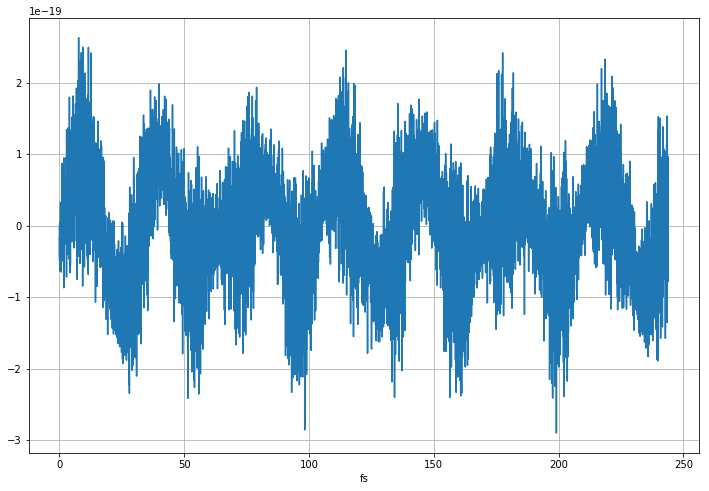

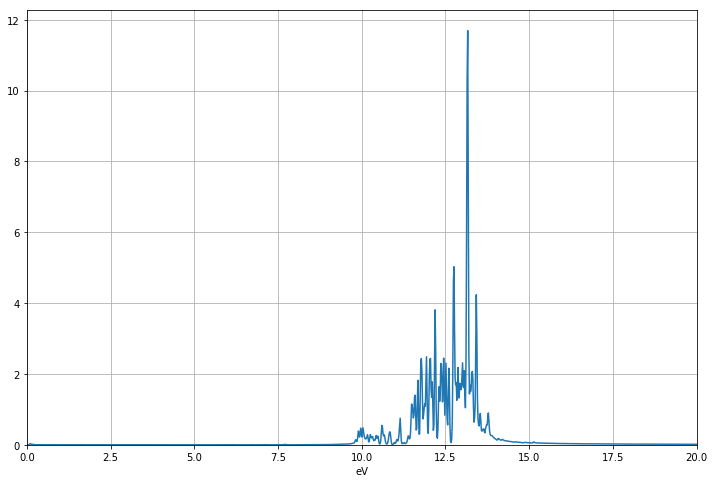

In [7]:
p=4.0
dt=1;steps=10000;
E=np.zeros(steps);
time=np.arange(steps)*dt
E=lambda t:10**(-p)*np.exp(-t/dt)
tddft.propagate(dt=dt,steps=steps,E=E,direction=[0,0,1])


plt.figure(figsize=(12,8))
plt.plot(time/fs_to_au,tddft.P.real)
plt.grid()
plt.xlabel('fs')
plt.savefig('FreezeHXC/save_z/polarization.png')
spectrum=np.fft.fft(tddft.P)
freq = np.fft.fftfreq(steps, d=dt)*2*np.pi*Hartree
spectrum=spectrum[np.argsort(freq)]
freq=np.sort(freq)
spectrum=np.abs(spectrum*freq)**2
from scipy.ndimage.filters import gaussian_filter1d
plt.figure(figsize=(12,8))
plt.plot(freq,gaussian_filter1d(spectrum,1),'-')
plt.xlim([0,20])
plt.ylim([0,None])
plt.grid()
plt.xlabel('eV')
plt.savefig('FreezeHXC/save_z/spectrum_lr.png')

 37%|███▋      | 3687/10000 [22:22<1:05:28,  1.61it/s]

KeyboardInterrupt: 

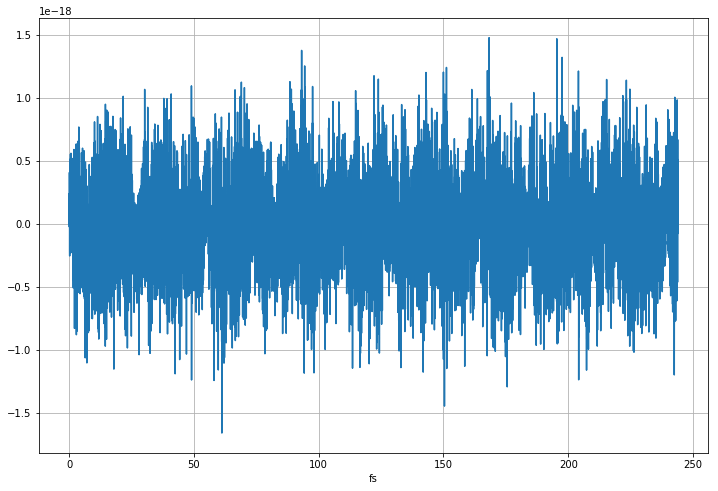

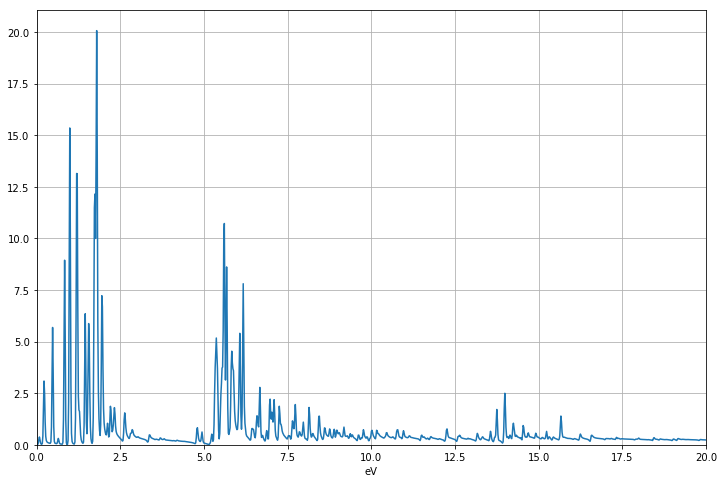

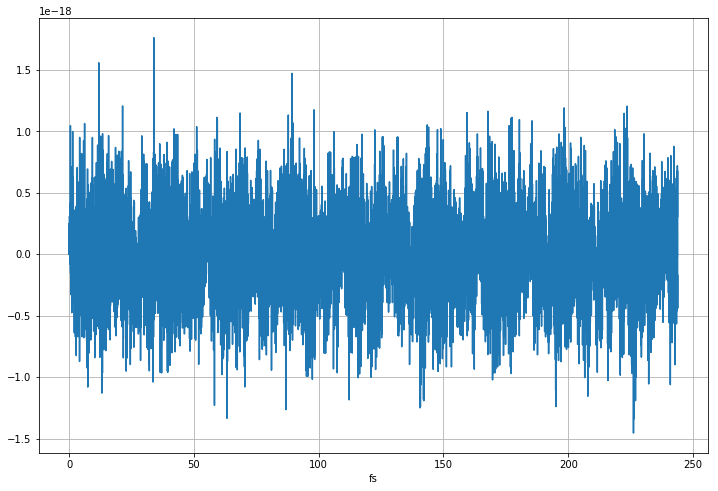

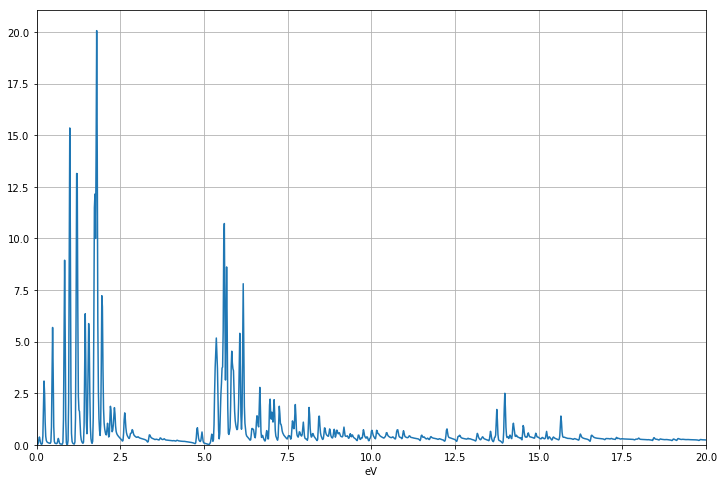

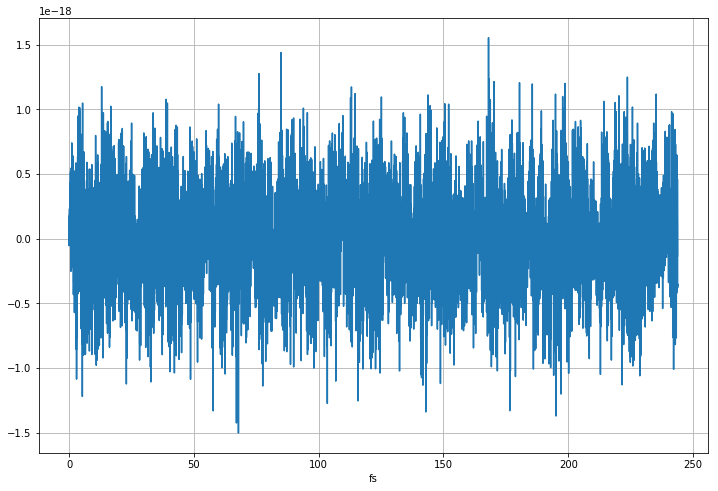

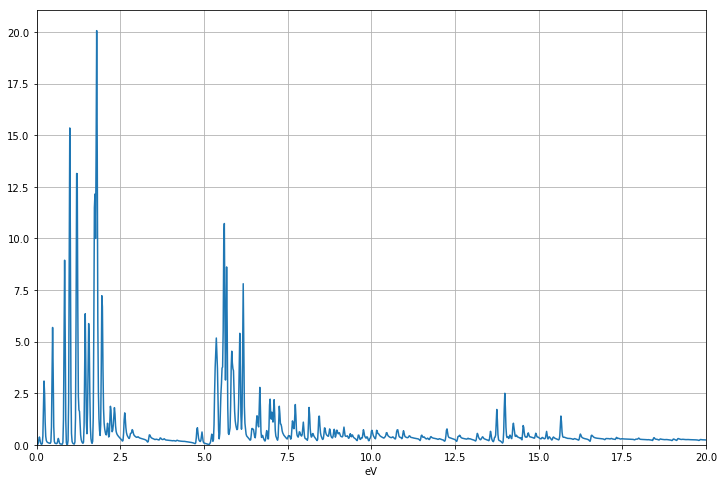

In [8]:
n_corrections=np.arange(5,dtype=int)+1
folder='DynamicalHXC/save_x/n_corr/'
for n in n_corrections:
    folder_n=folder+str(n)
    os.mkdir(folder_n)
    
    dt=1;steps=10000;
    E=np.zeros(steps);
    time=np.arange(steps)*dt
    E=lambda t:10**(-p)*np.exp(-t/dt)
    tddft.propagate(dt=dt,steps=steps,E=E,direction=[1,0,0],n_corrections=n)
    
    
    
    plt.figure(figsize=(12,8))
    plt.plot(time/fs_to_au,tddft.P.real)
    plt.grid()
    plt.xlabel('fs')
    plt.savefig(folder_n+'/polarization.png')
    spectrum=np.fft.fft(tddft.P)
    freq = np.fft.fftfreq(steps, d=dt)*2*np.pi*Hartree
    spectrum=spectrum[np.argsort(freq)]
    freq=np.sort(freq)
    spectrum=np.abs(spectrum*freq)**2
    from scipy.ndimage.filters import gaussian_filter1d
    
    plt.figure(figsize=(12,8))
    plt.plot(freq,gaussian_filter1d(spectrum,1),'-')
    plt.xlim([0,20])
    plt.ylim([0,None])
    plt.grid()
    plt.xlabel('eV')
    plt.savefig(folder_n+'/spectrum_lr.png')